# Uczenie ze wzmocnieniem

In [1]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()

start = time.time()
steps = 0
episodes = 0

while steps < 4000:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    time.sleep(0.02)  # umożliwia płynne renderowanie na Windowsie
    steps += 1

    if done:
        obs, info = env.reset()
        episodes += 1

end = time.time()
print("FPS:", steps / (end - start))
print("Epizodów:", episodes)


FPS: 40.90463683234436
Epizodów: 179


## Implementacja Q-learningu na FrozenLake-v1

In [26]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros((n_states, n_actions))

epsilon = 0.1
alpha = 0.3
gamma = 0.99
episodes = 1000

rewards = []

for episode in range(episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        if np.random.uniform(0, 1) < epsilon or np.max(Q[state]) <= 0:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )
        state = next_state
        total_reward += reward

    rewards.append(total_reward)

## Ewaluacja

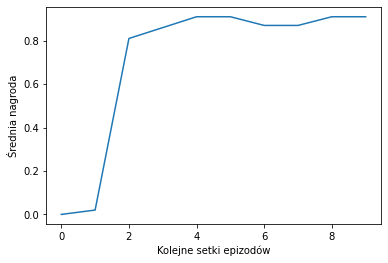

In [28]:
import matplotlib.pyplot as plt

avg_rewards = [np.mean(rewards[i:i+100]) for i in range(0, episodes, 100)]
plt.plot(avg_rewards)
plt.xlabel("Kolejne setki epizodów")
plt.ylabel("Średnia nagroda")
plt.show()